In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

dframe = pd.read_excel('knn-csc480-a4.xls', na_values=' ').set_index('Unnamed: 0')
myTrain = dframe.loc['U1':'U20',:]
myTest = dframe.loc['NU1':'NU5',:]

In [3]:
myTrain.head()

,TRUE BELIEVER,THE DA VINCI CODE,THE WORLD IS FLAT,MY LIFE SO FAR,THE TAKING,THE KITE RUNNER,RUNNY BABBIT,HARRY POTTER
Unnamed: 0,,,,,,,,
U1,2.0,4.0,NaN,3.0,NaN,NaN,1.0,1.0
U2,NaN,5.0,NaN,NaN,3.0,2.0,1.0,NaN
U3,3.0,NaN,1.0,2.0,2.0,NaN,NaN,5.0
U4,NaN,3.0,NaN,NaN,4.0,1.0,NaN,3.0
U5,2.0,4.0,3.0,NaN,NaN,2.0,1.0,NaN


In [4]:
myTest.head()

,TRUE BELIEVER,THE DA VINCI CODE,THE WORLD IS FLAT,MY LIFE SO FAR,THE TAKING,THE KITE RUNNER,RUNNY BABBIT,HARRY POTTER
Unnamed: 0,,,,,,,,
NU1,4.0,NaN,5.0,3.0,2.0,3.0,NaN,4.0
NU2,NaN,5.0,2.0,5.0,3.0,NaN,2.0,NaN
NU3,2.0,1.0,NaN,NaN,2.0,3.0,4.0,1.0
NU4,3.0,5.0,1.0,1.0,NaN,1.0,NaN,3.0
NU5,NaN,2.0,3.0,2.0,1.0,NaN,3.0,NaN


In [5]:
def myPredictRating(myTrain, myTestRow, myCol, k):
    myTrainValid = myTrain.dropna(subset=[myCol])
    myTrainMat = myTrainValid.drop(columns = myCol).fillna(0).values 
    myTestMat = myTestRow.drop(columns = myCol).fillna(0).values       

    myCorrs = np.zeros(myTrainMat.shape[0])
    for i in range(myTrainMat.shape[0]):                        
        myCorrs[i] = correlation(myTrainMat[i], myTestMat)    

    myTopk = np.argsort(-myCorrs)[:k]                           
    ratings = myTrainValid[myCol].iloc[myTopk].values         
    sims = myCorrs[myTopk]                                     
 
    prediction = np.sum(sims*ratings)/np.sum(sims)             
    
    return prediction                                           

In [6]:
def correlation(X, Y): 
    mysumX = 0      
    mysumY = 0     
    mysumXY = 0   
    mysqrSumX = 0   
    mysqrSumY = 0  
    tempN = len(X)           
    for i in range(tempN):   
         
        mysumX = mysumX + X[i]  
        mysumY = mysumY + Y[i]  
        mysumXY = mysumXY + X[i] * Y[i] 
        mysqrSumX = mysqrSumX + X[i] * X[i] 
        mysqrSumY = mysqrSumY + Y[i] * Y[i]  
                 
     
    mycorr = (tempN * mysumXY - mysumX * mysumY)/(np.sqrt((tempN * mysqrSumX - mysumX * mysumX)* 
            (tempN * mysqrSumY - mysumY * mysumY))) 
    return mycorr       

In [7]:
def myMaeCalculation(myTrain, myTest, k):
    errors = []                                                             
    for user in ['NU1', 'NU2', 'NU3', 'NU4', 'NU5']:                     
        myTestRow = myTest.loc[user,:]                                    
        myRatedColumns = myTestRow.dropna().index                       
        for myCol in myRatedColumns:                                        
            myPrediction = myPredictRating(myTrain, myTestRow, myCol, k)   
            errors.append(myPrediction - myTestRow[myCol])                 
    return np.mean(np.abs(np.array(errors)))                                

In [8]:
myErr = myMaeCalculation(myTrain, myTest, 3)                    
print('Mean Absolute Error with k = 3 on the Test Set:', myErr) 

Mean Absolute Error with k = 3 on the Test Set: 1.3780007890292134


In [9]:
print('{0:5s} {1:4s}'.format('K', 'MAE'))         
errors = []                                       
for k in range(1, 21):                              
    myErr = myMaeCalculation(myTrain, myTest, k)    
    errors.append(myErr)                           
    print('{0:<5d} {1:.4f}'.format(k, myErr))      

K     MAE 
1     1.8571
2     1.4129
3     1.3780
4     1.3687
5     1.4287
6     2.4596
7     1.2032
8     1.1928
9     1.2833
10    1.8248
11    1.4125
12    2.0201
13    2.5155
14    3.0059
15    2.1755
16    2.1338
17    2.1338
18    2.1338
19    2.1338
20    2.1338


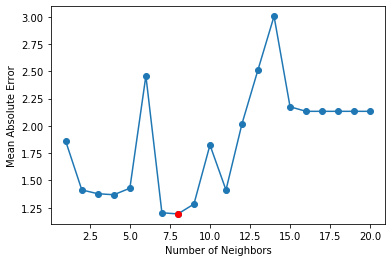

In [10]:
neighbors = np.array(range(1,21))  
plt.plot(neighbors, errors, marker='o') 
plt.plot(neighbors[np.argmin(errors)],errors[np.argmin(errors)], color='red', marker='o' ); 
plt.xlabel('Number of Neighbors') 
plt.ylabel('Mean Absolute Error'); 

In [11]:
print('{0:5s} {1:20s} {2:4s}'.format('User', 'Item', 'Rating'))  
for user in ['NU1', 'NU2']:                                     
    myTestRow = myTest.loc[user,:]                              
    myItems = myTestRow.index[myTestRow.isna()]                 
    for myCol in myItems:                                        
        myPrediction = myPredictRating(myTrain, myTestRow, myCol, 8)         
        print('{0:<5s} {1:<20s} {2:4.3f}'.format(user, myCol, myPrediction)) 

User  Item                 Rating
NU1   THE DA VINCI CODE    4.235
NU1   RUNNY BABBIT         2.280
NU2   TRUE BELIEVER        3.591
NU2   THE KITE RUNNER      2.892
NU2   HARRY POTTER         3.213


In [12]:
def myTop3Recommendation(myTrain, user, k, top3):
    myTestRow = myTrain.loc[user,:]              
    myTrainExcluded = myTrain.drop(index=user)    
    myItems = myTestRow.index[myTestRow.isna()]   
    myRating = []                                
    for myCol in myItems:                        
        myRating.append(myPredictRating(myTrainExcluded, myTestRow, myCol, k))
    
    myRes = pd.DataFrame({'user': user, 'item': myItems, 'Rating': myRating}).sort_values('Rating', ascending=False) 
    return myRes.head(top3)

In [13]:
generate = []                               
for user in ['U2', 'U5', 'U13', 'U20']:     
    generate.append(myTop3Recommendation(myTrain, user, 4, 3))  
generate = pd.concat(generate).reset_index(drop=True)              
print(generate)                                                 

  user               item    Rating
0   U2      TRUE BELIEVER  3.684472
1   U2       HARRY POTTER  3.198937
2   U2     MY LIFE SO FAR  2.095882
3   U5       HARRY POTTER  3.353351
4   U5     MY LIFE SO FAR  2.833172
5   U5         THE TAKING  2.026535
6  U13  THE DA VINCI CODE  4.069623
7  U13     MY LIFE SO FAR  2.458282
8  U13      TRUE BELIEVER  2.386469
9  U20       RUNNY BABBIT  1.435983
